In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("C:\\Users\\Lenovo\\Downloads\\full_data.csv")

In [3]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


### Performing EDA

In [4]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [5]:
df.nunique()

gender                  2
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               4
Residence_type          2
avg_glucose_level    3895
bmi                   342
smoking_status          4
stroke                  2
dtype: int64

In [6]:
df.isnull().sum().head()

gender           0
age              0
hypertension     0
heart_disease    0
ever_married     0
dtype: int64

In [7]:
df.work_type.unique()

array(['Private', 'Self-employed', 'Govt_job', 'children'], dtype=object)

In [8]:
df.Residence_type.unique()

array(['Urban', 'Rural'], dtype=object)

In [9]:
df.smoking_status.unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [10]:
from pandas_profiling import ProfileReport

In [11]:
report = ProfileReport(df,explorative =True)

In [12]:
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

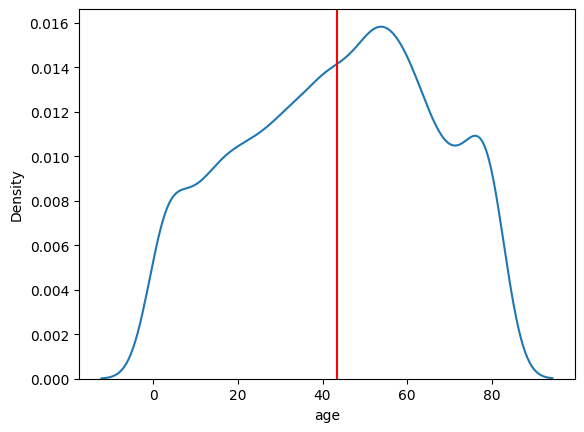

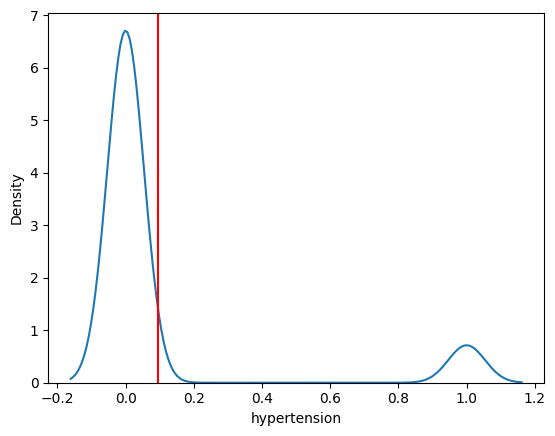

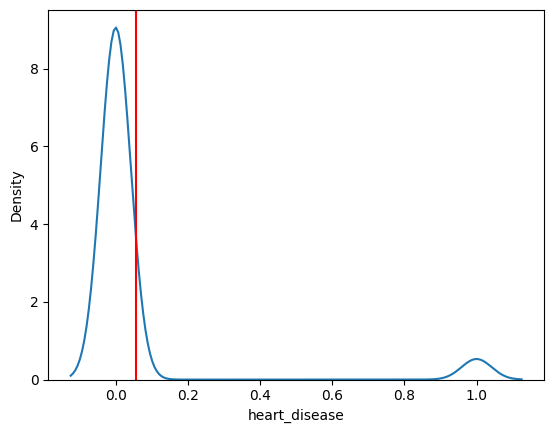

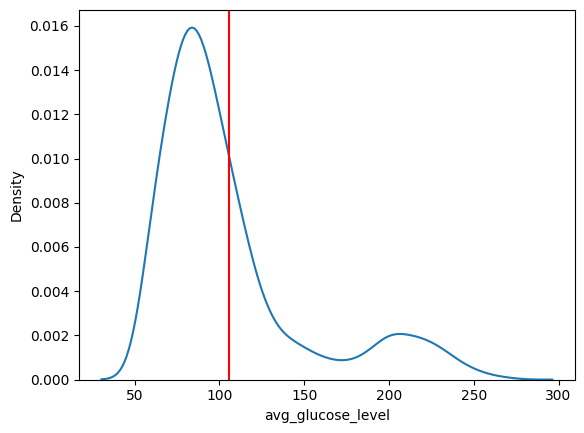

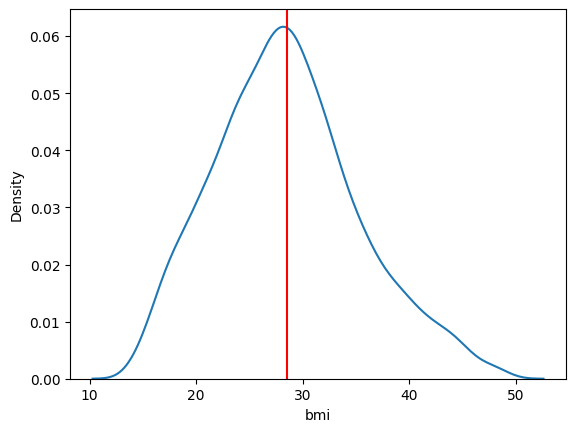

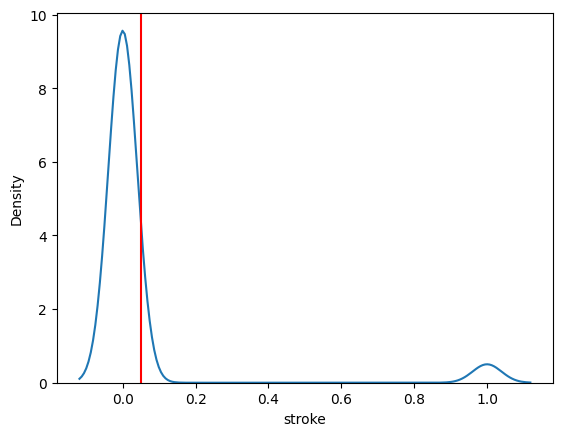

In [13]:
import matplotlib.pyplot as plt 
import seaborn as sns
for i in df.columns:
    if df[i].dtype!='O':
          sns.kdeplot(df[i])
          plt.axvline(df[i].mean(),color = 'red')
          plt.show()
    

In [19]:
categorical_features = [i for i in df.columns if df[i].dtype == 'O']

In [20]:
categorical_features

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [21]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression 
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel,RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [22]:
!pip install xgboost 


[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
import xgboost as xgb

### Feature engineering 

In [24]:
encoder = LabelEncoder()
for i in categorical_features:
    df[i]= encoder.fit_transform(df[i])


In [25]:
df.head(2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,1,228.69,36.6,1,1
1,1,80.0,0,1,1,1,0,105.92,32.5,2,1


In [26]:
for i in categorical_features:
    print(i,df[i].nunique())

gender 2
ever_married 2
work_type 4
Residence_type 2
smoking_status 4


In [104]:
x = [i for i in df.columns if i!='stroke']
x = df[x]
y =df['stroke']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.33,random_state = 10)

In [28]:
y_test

4238    0
2447    0
3159    0
4410    0
4948    0
       ..
4549    0
1433    0
1797    0
2936    0
860     0
Name: stroke, Length: 1644, dtype: int64

In [29]:
selected_feat = SelectFromModel(Lasso(alpha = 0.005,random_state = 10))
selected_feat.fit(x_train,y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=10))

In [30]:
imp_feat = x_train.columns[(selected_feat.get_support())]
imp_feat

Index(['age', 'ever_married', 'work_type', 'avg_glucose_level', 'bmi'], dtype='object')

In [31]:
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

for i in range(2,7):
    rfe = RFE(estimator=RandomForestClassifier(),n_features_to_select=i, verbose=0)
    rfe.fit(x_train,y_train)
    print(f"Accuracy with Feature {i} ==>",metrics.accuracy_score(y_test, rfe.predict(x_test)))

Accuracy with Feature 2 ==> 0.9482968369829684
Accuracy with Feature 3 ==> 0.9507299270072993
Accuracy with Feature 4 ==> 0.9501216545012166
Accuracy with Feature 5 ==> 0.9507299270072993
Accuracy with Feature 6 ==> 0.9501216545012166


In [48]:
clf = DecisionTreeClassifier(max_depth = 3)
clf.fit(x_train,y_train)

0.9525547445255474

In [62]:
clfr = RandomForestClassifier()
clfr.fit(x_train,y_train)
clfr.feature_importances_

array([0.03028128, 0.23872756, 0.0268694 , 0.01948657, 0.0209004 ,
       0.05408291, 0.03629224, 0.27090281, 0.23514708, 0.06730975])

In [82]:
features_importance = pd.DataFrame(clf.feature_importances_,clfr.feature_importances_)

In [83]:
features_importance['records'] = x_train.columns

In [89]:
features_importance.sort_index()

,0,records
0.019487,0.000000,heart_disease
0.020900,0.049218,ever_married
0.026869,0.008650,hypertension
0.030281,0.000000,gender
0.036292,0.000000,Residence_type
0.054083,0.041557,work_type
0.067310,0.000000,smoking_status
0.235147,0.000000,bmi
0.238728,0.801114,age
0.270903,0.099461,avg_glucose_level


### Only important features are only selected 

In [90]:
imp_features = ['age','hypertension','hypertension','ever_married','work_type','avg_glucose_level','smoking_status']

## Model Building 

In [106]:
fdf = df[imp_features]

In [113]:
x_train,x_test,y_train,y_test = train_test_split(fdf,y,test_size = 0.33,random_state = 10)

In [143]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold 
kfold = KFold(n_splits = 10)

### Test accuracy of different models 

In [123]:
from sklearn.linear_model import LinearRegression,SGDClassifier,LogisticRegression


In [135]:
classifier = [LinearRegression(),SGDClassifier(),LogisticRegression(),DecisionTreeClassifier(max_depth = 3),RandomForestClassifier()]
names = ['linearregression','gradientdescent','logisticregression','decisiontreeclassifier','randomforest']


In [136]:
def score(model,x_train,x_test,y_train,y_test,names):
    model.fit(x_train,y_train)
    print(names+str('-->') + str(model.score(x_test,y_test)))

In [138]:
for i,k in zip(classifier,names):
    score(i,x_train,x_test,y_train,y_test,k)

linearregression-->0.07006501641176932
gradientdescent-->0.9513381995133819
logisticregression-->0.9531630170316302
decisiontreeclassifier-->0.9525547445255474


C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


randomforest-->0.9495133819951338


In [144]:
scores = []
for i in classifier:
    cv_score = cross_val_score(i,fdf,y,cv=kfold,scoring = 'accuracy')
    scores.append(cv_score.mean())
cv_mean = pd.DataFrame(scores,index=names)
cv_mean.columns = ['Accuracy']
cv_mean.sort_values(by='Accuracy',ascending=False)

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 106, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py", line 211, in ac

,Accuracy
logisticregression,0.950285
decisiontreeclassifier,0.948879
randomforest,0.941248
gradientdescent,0.874582
linearregression,NaN


In [148]:
cv_mean.sort_values(by='Accuracy',ascending =False)

,Accuracy
logisticregression,0.950285
decisiontreeclassifier,0.948879
randomforest,0.941248
gradientdescent,0.874582
linearregression,NaN


### By this we can conclude logistic regression is giving best result 